In [1]:
from linearalgebra import dot, Vector
from typing import List
inputs: List[List[float]] = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],
                             [1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],
                             [1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],
                             [1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]


In [2]:
def predict(x: Vector, beta: Vector) -> float:
    '''assumes that the first element of x is 1'''
    return dot(x, beta)

In [3]:
def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) -y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

In [4]:
x = [1, 2, 3]
y = 30
beta = [4, 4, 4] 
assert error(x, y, beta) == -6
assert squared_error(x, y, beta) == 36

In [5]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

assert sqerror_gradient(x, y, beta) == [-12, -24, -36]

In [6]:
import random
import tqdm
from linearalgebra import vector_mean
from GradientDescent import gradient_step

In [7]:
def least_squares_fit(xs: List[Vector], ys: List[float], learning_rate: float = 0.001, num_steps: int = 1000, batch_size: int = 1) -> Vector:
    '''find the beta that minimizes the sum of squared errors assuming the model y = dot(x, beta).'''
    # Start with a random guess
    guess = [random.random() for _ in xs[0]]
    for _ in tqdm.trange(num_steps, desc='least squares fit'):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start: start+batch_size]
            batch_ys = ys[start: start+batch_size]

            gradient = vector_mean([sqerror_gradient(x, y, guess) for
                            x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)
            return guess

# Goodness of Fit

In [8]:
from stati import daily_minutes_good

In [9]:
def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
    sum_of_squared_errors = sum(error(x, y, beta) ** 2 for x, y in zip(xs, ys))
    return 1.0 - sum_of_squared_errors/total_sum_of_squares(ys)

# Digression: The Bootstrap

In [141]:
from typing import TypeVar, Callable
from stati import median

In [142]:
X = TypeVar('X')
Stat = TypeVar('Stat')

def bootstrap_sample(data: List[X]) -> List[X]:
    '''randomly samples len(data) elements with replacement'''
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X], stats_fn: Callable[[List[X]],
                        Stat], num_samples: int) -> List[Stat]:
                        '''evaluates stats_fn on num_samples bootstrap samples from data'''
                        return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

In [143]:
close_to_100 = [99.5 + random.random() for _ in range(101)]
far_from_100 = ([99.5 + random.random()] + [random.random() for _ in range(50)]+[200 + random.random() for _ in range(50)])

In [144]:
print(close_to_100[:20])
print()
print(far_from_100[80:])

[99.92529252479204, 100.37155057516433, 100.48786577303838, 99.67517247610394, 100.04080758914155, 100.29157157999938, 99.80303822954278, 99.77210566979525, 100.25111492128138, 100.34219438733687, 99.90864129978796, 100.39486539643202, 99.57084436359163, 99.94738320765532, 100.04543325853176, 99.78293449930479, 100.09857713314881, 99.95832140422156, 100.00761208982841, 100.33230625071535]

[200.4643964352741, 200.71129256689548, 200.99360871645442, 200.54222510582795, 200.28910871535743, 200.2073847431325, 200.64496703481478, 200.08711395824642, 200.54441910188442, 200.14283165021365, 200.61115395159155, 200.12005582446085, 200.49103248729693, 200.39350473169506, 200.18305395533332, 200.9887088730691, 200.19794554534099, 200.1667526046628, 200.83871227583307, 200.99863617270518, 200.83651717436436]


In [170]:
from stati import median, standard_deviation

print('Median of median_close', median(close_to_100))
print('Median of median_far', median(far_from_100))

Median of median_close 99.95493441199434
Median of median_far 99.95078299448765


In [146]:
median_close = bootstrap_statistic(close_to_100, median, 100)
median_far = bootstrap_statistic(far_from_100, median, 100)
print()
print('Printing median of close_to_100', median(close_to_100))
print('Printting median of far_from_100', median(far_from_100))


Printing median of close_to_100 99.95493441199434
Printting median of far_from_100 99.95078299448765


In [147]:
print('Median close', median_close[80:])
print()
print('Median far', median_far[:20])
print()
print(standard_deviation(median_close))
print(standard_deviation(median_far))

Median close [100.03439775212522, 99.90580330081332, 99.95493441199434, 99.91468520775035, 99.90864129978796, 99.89791638737843, 99.962621368104, 99.96460243461917, 99.95493441199434, 99.91865854282797, 99.95493441199434, 99.91865854282797, 99.94568493200096, 100.02203735114475, 99.96460243461917, 99.95832140422156, 99.99308080145471, 99.91468520775035, 99.92529252479204, 99.962621368104]

Median far [0.8205801999866031, 0.8960238916241667, 200.05573883242764, 99.95078299448765, 0.9451823516480865, 0.8405850123340208, 200.08711395824642, 0.9141635520908992, 0.9451823516480865, 200.06835942500186, 200.0379589036552, 0.8420652906878848, 200.15671212127586, 0.8626914361565861, 0.9141635520908992, 0.8420652906878848, 0.9992645618918677, 0.9992645618918677, 200.09582462518628, 0.9141635520908992]

0.04098632769419471
93.51295898642998


In [148]:
import matplotlib.pyplot as plt
from collections import Counter

count = Counter(median_close)
keys = [round(i) for i in count.keys()]
count_median_far = Counter(median_far)
key_median_far = [round(i, 1) for i in count_median_far.keys()]

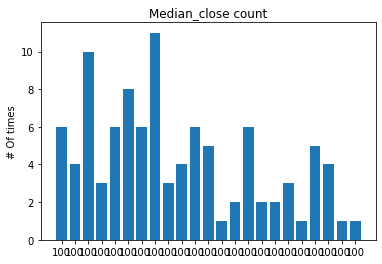

In [149]:
plt.bar(range(len(count)),count.values())
plt.title("Median_close count")
plt.ylabel("# Of times")
plt.xticks(range(len(count)), keys)
plt.show()

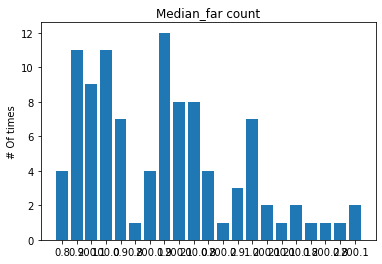

In [155]:
plt.bar(range(len(count_median_far)), count_median_far.values())
plt.title("Median_far count")
plt.ylabel("# Of times")
plt.xticks(range(len(count_median_far)), key_median_far)
plt.show()

In [152]:
print(standard_deviation(median_close))
print(standard_deviation(median_far))

0.04098632769419471
93.51295898642998


# Standard Errors of Regression Coefficients

In [172]:
from typing import Tuple
import datetime

In [185]:
def estimate_sample_beta(pairs: List[Tuple[Vector, float]]):
    x_sample = [x for x, _ in pairs]
    y_sample = [y for _, y in pairs]
    beta = least_squares_fit(x_sample, y_sample,5000, 25)
#     print('Bootstrap sample', beta);
    return beta

In [186]:
random.seed(0)
bootstrap_betas = bootstrap_statistic(list(zip(inputs, daily_minutes_good)), estimate_sample_beta, 100);

least squares fit:   0%|                                                                        | 0/25 [00:00<?, ?it/s]


least squares fit:   0%|                                                                        | 0/25 [00:00<?, ?it/s]


In [187]:
bootstap_standard_errors = [standard_deviation([beta[i] for beta in bootstrap_betas]) for i in range(4)]
print(bootstap_standard_errors)

[99138.1948049879, 1913858.961334884, 467683.94654216483, 124374.57023602404]


In [193]:
# Normal Cdf
import math

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [194]:
def p_value(beta_hat_j: float, sigma_hat_j: float) -> float:
    if beta_hat_j > 0:
        return 2 * (1- normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)

In [197]:
print(p_value(30.58, 1.27))
print(p_value(.972, .103))
print(p_value(.923, 1.249))

0.0
0.0
0.4599123452566003
